# CSE3013- ARTIFICIAL INTELLIGENCE
# TOPIC- CREDIT CARD FRAUD DETECTION
***

## Team Members-
### Ananya Pantvaidya (20BCE0678)
### Arsh Ansari (20BCE0371)
### Kushagra Srivastava (20BCE2060)
### Priadarshni Muthukumar (20BCE2510)
***

### Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Importing the dataset
##### We have downloaded our dataset from Kaggle

In [2]:
data=pd.read_csv("creditcard.csv")

### Taking a look at the features of the dataset

In [3]:
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


##### V1-V28 are the result of a PCA dimensionality reduction 

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


##### In the following cell we can see the datatypes of the features

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

##### Now we check for null values

In [7]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

##### We see that in this dataset, there are no null values anywhere.

In [8]:
data=data.sample(frac=0.1, random_state=1)

print(data.shape)

(28481, 31)


##### We will be using about 10% of the dataset
### Classifying the transactions into safe and fraudulent ones
##### Now we will check the column "Class" to see how many safe and fraudulent transactions there are in the dataset

In [9]:
data["Class"].value_counts()

0    28432
1       49
Name: Class, dtype: int64

In [10]:
safe=data[data.Class==0]
fraud=data[data.Class==1]
print('No. of safe cases= {}'.format(len(safe)))
print('No. of fraud cases= {}'.format(len(fraud)))

frac=len(fraud)/len(safe)
print('Fraction of fraud cases= {}'.format(frac))

No. of safe cases= 28432
No. of fraud cases= 49
Fraction of fraud cases= 0.0017234102419808666


##### We can see that the number of fraud transactions is very less compared to the number of safe transactions (only about 0.17%)

In [11]:
print(safe.shape)

(28432, 31)


##### We have printed the shape of the safe transactions part of the dataset
##### Now we will see the shape of the fraud transactions part of the dataset

In [12]:
print(fraud.shape)

(49, 31)


In [13]:
safe.Amount.describe()

count    28432.000000
mean        89.813898
std        270.636594
min          0.000000
25%          5.990000
50%         22.380000
75%         78.820000
max      19656.530000
Name: Amount, dtype: float64

In [14]:
fraud.Amount.describe()

count      49.000000
mean      173.505306
std       387.996569
min         0.000000
25%         1.000000
50%         4.900000
75%       122.680000
max      2125.870000
Name: Amount, dtype: float64

### Visualising the dataset

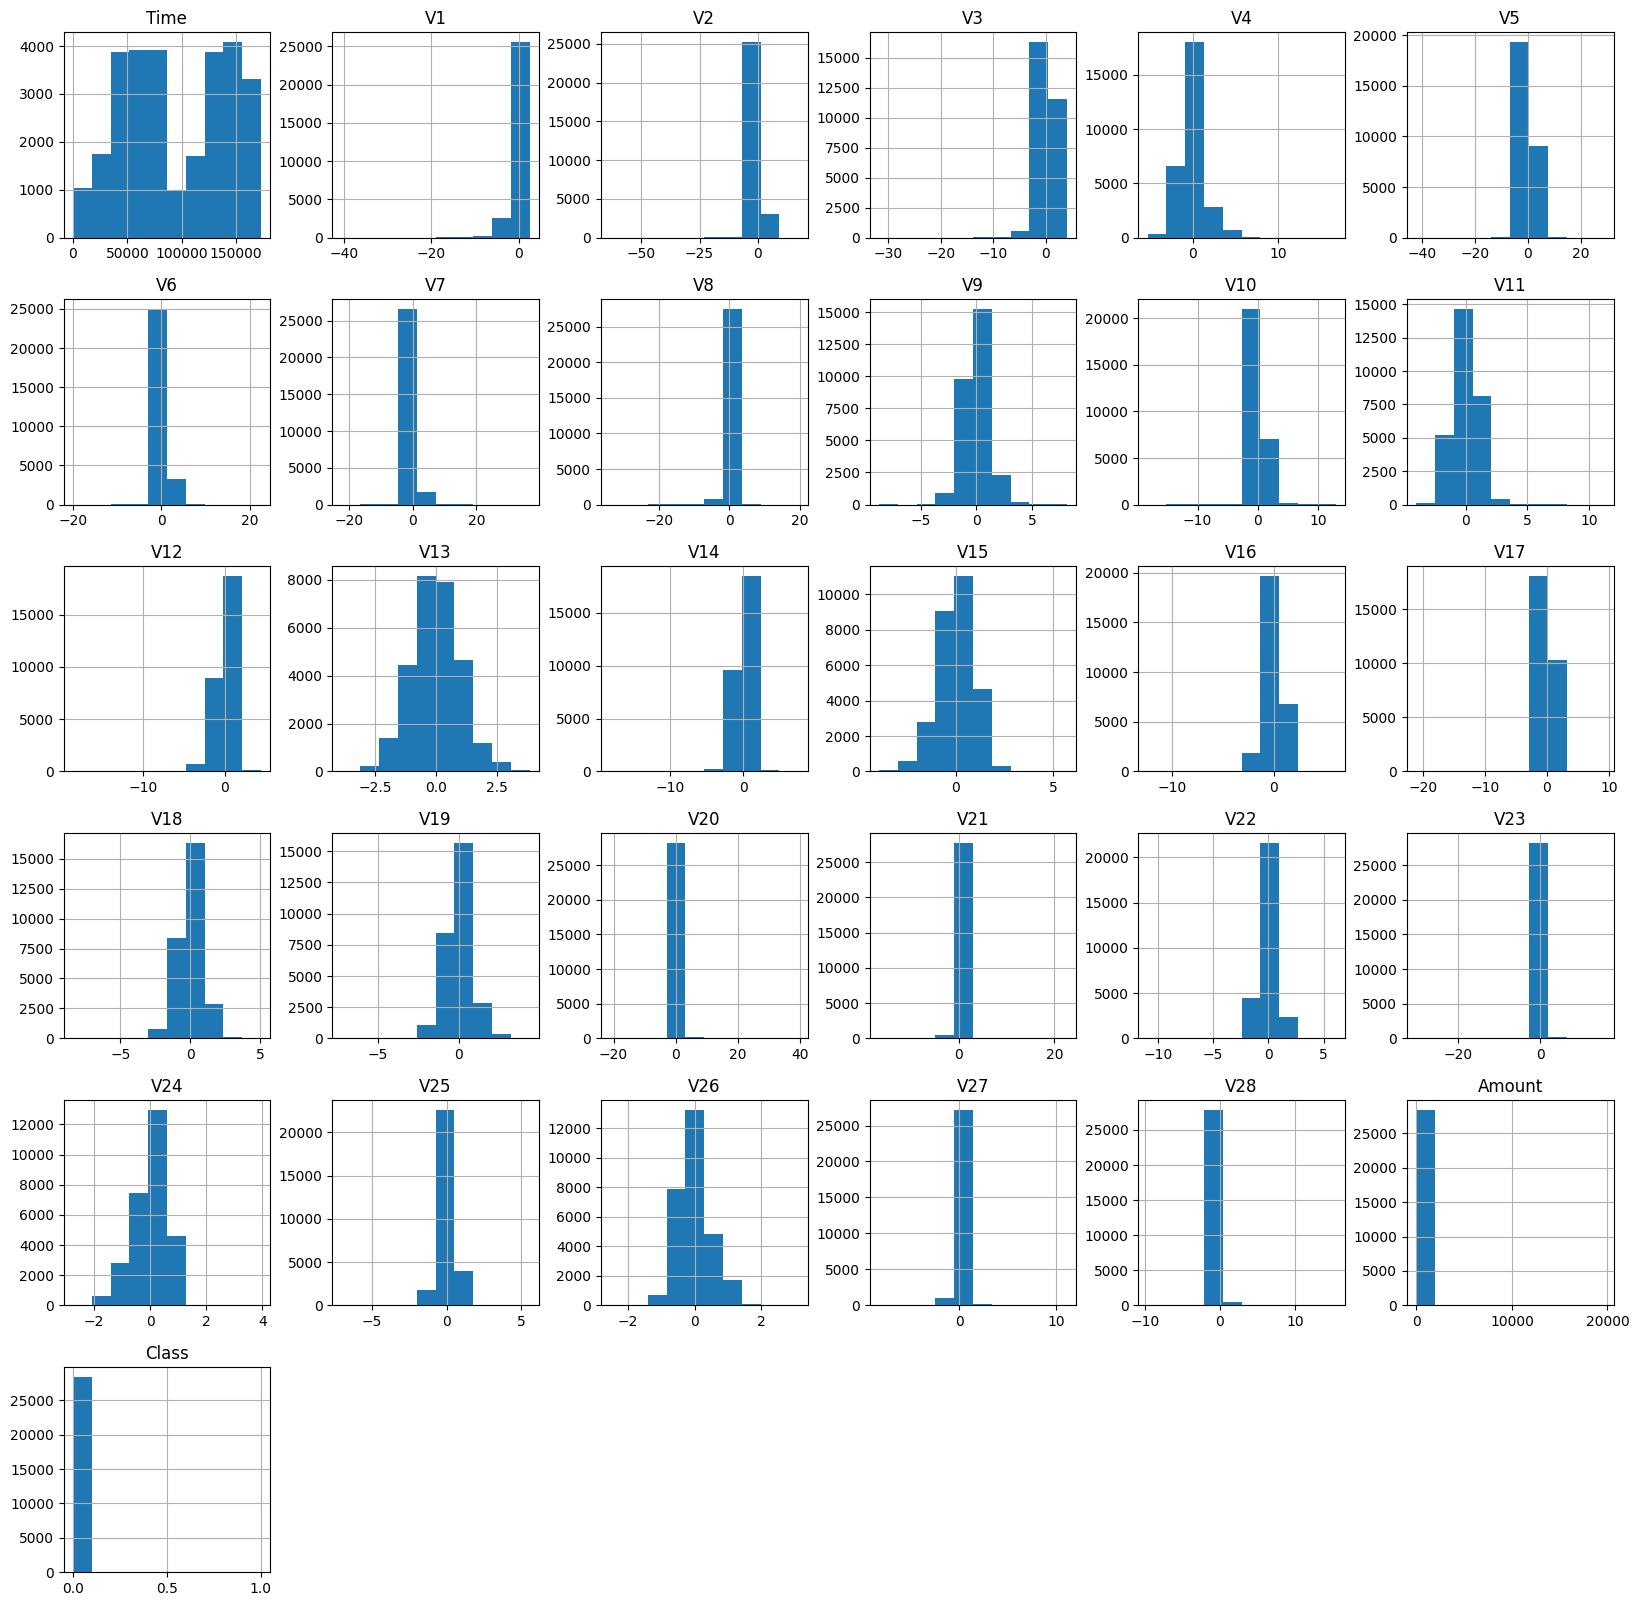

In [15]:
data.hist(figsize=(20,20))
plt.show()

##### Here we have printed the histograms for the dataset we are using. We can see in the histogram for the "Class" column that the number of fraudulent transactions is negligible compared to the safe transactions

##### Next we look at a relational plot

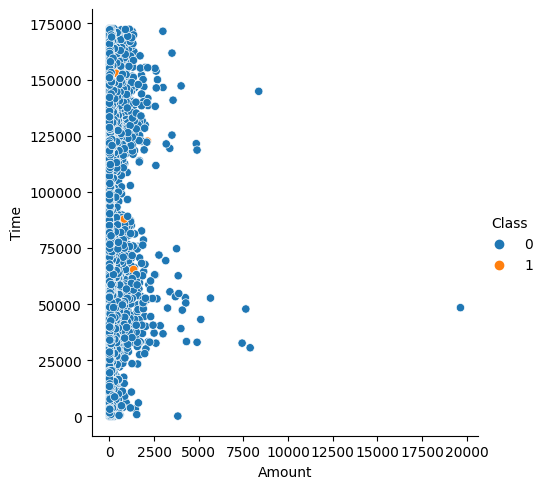

In [16]:
sns.relplot(x='Amount', y='Time', hue='Class', data=data)
plt.show()

##### Now, we make a correlation matrix, and then a heatmap based on that

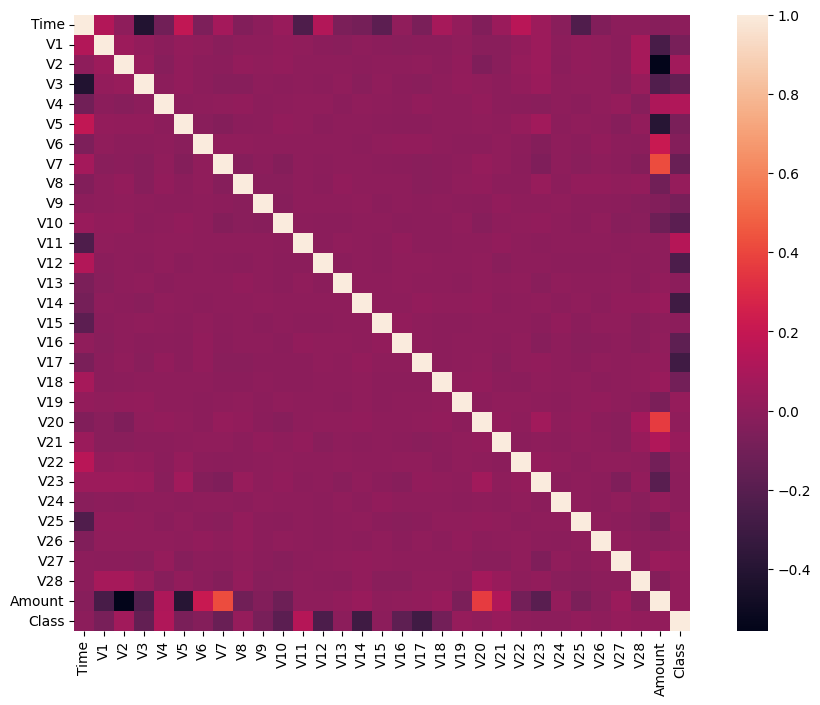

In [17]:
cormat=data.corr()
fig=plt.figure(figsize=(12,8))

sns.heatmap(cormat, square=True)
plt.show()

### Importing the libraries for processing our dataset

In [18]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

### Segregating the data into features and target

In [19]:
X=data.iloc[:,:-1]
y=data["Class"]

In [20]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

##### We have taken our test size as 20% of the dataset

In [21]:
print(X.shape)
print(y.shape)

(28481, 30)
(28481,)


##### Here we can see that the dataset has been split into the features and target
### Importing our classifiers
##### We will now import the IsolationForest classifier, and the LocalOutlierFactor classifier. They are used for anomaly detection.
##### The LocalOutlierFactor calculates the anomaly score of each sample. It measures the local deviation of density of a given sample with respect to its neighbours.
##### The IsolationForest isolates the observations by randomly selecting a feature and then randomly selecting a value between the minimum and maximum values of that select feature. It returns an anomaly score.

In [22]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.neighbors import LocalOutlierFactor

##### Defining a random state

In [23]:
state=1

### Defining the outlier detection methods

In [24]:
classifiers={
    "Isolation Forest": IsolationForest(max_samples=len(X),
                                       contamination=frac,
                                       random_state=state),
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20,
                                               contamination=frac),
    "Random Forest": RandomForestClassifier(max_samples=len(X),
                                            random_state=state)
}

### Fitting the model

In [25]:
n_outliers=len(fraud)

for i, (clf_name, clf) in enumerate(classifiers.items()):
    #fit data and tag outliers
    if clf_name=='Local Outlier Factor':
        y_pred=clf.fit_predict(X)
        score_pred=clf.negative_outlier_factor_
    elif clf_name=='Isolation Forest':
        clf.fit(X)
        scores_pred=clf.decision_function(X)
        y_pred=clf.fit_predict(X)
    else:
        clf.fit(X, y)
        y_pred=clf.predict(X)
        
    #reshape pred vals to 0 for valid, 1 for fraud
    y_pred[y_pred==1] = 0
    y_pred[y_pred==-1]= 1
    
    n_errors=(y_pred != y).sum()
    
    #run classification metrics
    print("{}:{}".format(clf_name, n_errors))
    print(accuracy_score(y, y_pred))
    print(classification_report(y, y_pred))

Isolation Forest:71
0.99750711000316
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.28      0.29      0.28        49

    accuracy                           1.00     28481
   macro avg       0.64      0.64      0.64     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor:97
0.9965942207085425
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.02      0.02      0.02        49

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481

Random Forest:49
0.9982795547909132
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.00      0.00      0.00        49

    accuracy                           1.00     28481
   macro avg

***